<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

### **Similaridade de Documentos**

Analisamos a similaridade entre os termos usando várias métricas de similaridade e distância nos exemplos anteriores. Também vimos como a vetorização foi útil para que os cálculos matemáticos se tornassem muito mais fáceis, especialmente ao calcular distâncias entre vetores. 

>
Neste exemplo, vamos analisar semelhanças entre documentos. Por enquanto, você já deve saber que um documento é definido como um corpo de texto, que pode conter sentenças ou parágrafos de texto. Para analisar a similaridade de documentos, faremos um pré-processamento de texto básico, vetorizando documentos usando a representação TF-IDF. Assim que tivermos as representações vetoriais dos vários documentos, podemos calcular a similaridade entre os documentos usando alguma distância padrão ou métricas de similaridade.

Para tornar as coisas interessantes, nós realmente mostramos isso com um exemplo do mundo real de tentar construir um sistema de recomendação de filme! Considere isso uma mini-simulação do que acontece quando você procura ou assiste a um filme online e filmes semelhantes são recomendados para você com base na descrição e no conteúdo do filme. No mundo real, você obviamente terá mais parâmetros e recursos como classificações, gênero, histórico de preferências do usuário e assim por diante, mas o recomendador que vamos construir irá realmente mostrar como a similaridade de documentos pode ajudar a construir recomendações simples, mas incríveis.

Construímos um sistema de recomendação de filmes pelo qual, com base em dados/metadados relativos a diferentes filmes, tentamos recomendar filmes semelhantes de interesse.

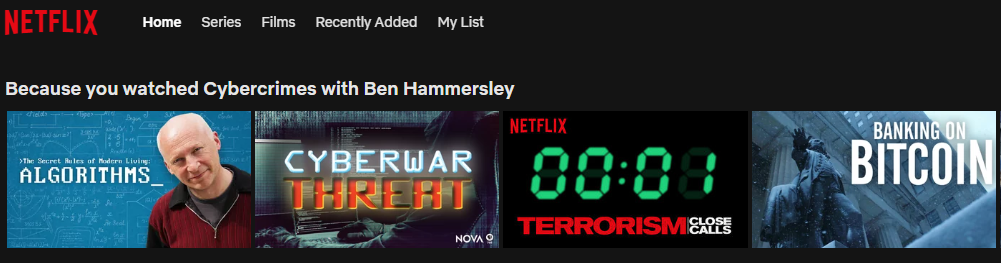

Como nosso foco não está realmente em mecanismos de recomendação, mas em PLN, iremos alavancar os metadados baseados em texto para cada filme para tentar recomendar filmes semelhantes com base em filmes específicos de interesse. Isso se enquadra em **recomendações baseadas em conteúdo**.

**Carregando o conjunto de dados**

Usaremos o popular conjunto de dados de 5.000 filmes TMDB para este experimento, que você pode encontrar no Kaggle em https://www.kaggle.com/tmdb/tmdb-movie-metadata/home. 

>
Uma versão compactada do mesmo conjunto de dados será disponibilizada em nosso repositório oficial do GitHub.

In [1]:
import pandas as pd

df = pd.read_csv('/content/tmdb_5000_movies.csv.gz', compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [2]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Obviamente, para nosso simples recomendador de filme de similaridade de documento baseado em conteúdo, não precisamos de todos esses campos para nossa análise (embora eles possam ser úteis se você quiser construir um sistema mais sofisticado).

In [6]:
df = df.loc[:, ('title', 'tagline', 'overview', 'genres', 'popularity')]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   genres       4800 non-null   object 
 4   popularity   4800 non-null   float64
 5   description  4800 non-null   object 
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


In [7]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


Aqui, você construirá seu próprio sistema de recomendação de filmes. Usaremos o seguinte pipeline:

* Pré-processamento de texto
* Engenharia de Características (*Feature Engineering*)
* Cálculo de similaridade de documentos
* Encontrar os melhores filmes semelhantes
* Criar uma função de recomendação de filme

As recomendações tratam de compreender as características subjacentes que nos fazem favorecer uma escolha em detrimento da outra. A similaridade entre os itens (neste caso, filmes) é uma maneira de entender por que escolhemos um filme em vez de outro. Existem diferentes maneiras de calcular a similaridade entre dois itens. Uma das medidas mais amplamente utilizadas é a **similaridade por cosseno**.

**Pré-processamento**

In [8]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

**TF-IDF**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape

(4800, 20667)

Usamos uni-grama e bi-gramas como nossas características e removemos termos que ocorrem em apenas um documento em todo o corpus. Agora que temos nossos documentos normalizados e vetorizados com representações vetoriais baseadas em TF-IDF, veremos como calcular a similaridade de documentos com a similaridade por cosseno.

**Similariade de documentos aos pares**

Vimos os conceitos relativos à computação de similaridade por cosseno e os implementamos para similaridade de termo. Aqui, reutilizamos os mesmos conceitos para calcular as pontuações de similaridade por cosseno para documentos em vez de termos. Os vetores de documentos serão o saco de vetores baseados em modelos de palavras com valores TF-IDF em vez de frequências de termos.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,1.000000,0.010701,0.000000,0.019030,0.028687,0.024901,0.000000,0.026516,0.000000,0.007420,...,0.009702,0.0,0.023336,0.033549,0.000000,0.000000,0.0,0.006892,0.000000,0.000000
1,0.010701,1.000000,0.011891,0.000000,0.041623,0.000000,0.014564,0.027122,0.034688,0.007614,...,0.009956,0.0,0.004818,0.000000,0.000000,0.012593,0.0,0.022391,0.013724,0.000000
2,0.000000,0.011891,1.000000,0.000000,0.000000,0.000000,0.000000,0.022242,0.015854,0.004891,...,0.042617,0.0,0.000000,0.000000,0.016519,0.000000,0.0,0.011682,0.000000,0.004000
3,0.019030,0.000000,0.000000,1.000000,0.008793,0.000000,0.015976,0.023172,0.027452,0.073610,...,0.000000,0.0,0.009667,0.000000,0.000000,0.000000,0.0,0.028354,0.021785,0.027735
4,0.028687,0.041623,0.000000,0.008793,1.000000,0.000000,0.022912,0.028676,0.000000,0.023538,...,0.014800,0.0,0.000000,0.000000,0.000000,0.010760,0.0,0.010514,0.000000,0.000000


Agora, criamos um fluxo de trabalho para determinar os filmes mais semelhantes e recomendados para um filme de amostra antes de construir nosso sistema de recomendação de filmes. Antes de fazer isso, vamos construir uma lista de todos os títulos de filmes em nosso conjunto de dados.

In [12]:
movies_list = df['title'].values
movies_list, movies_list.shape

(array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
        ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
        'My Date with Drew'], dtype=object), (4800,))

Vamos pegar **Minions**, um dos filmes mais populares, e tentar encontrar os filmes mais semelhantes para recomendar. A seguir estão as etapas principais que serão úteis para nós mais tarde construirmos uma função genérica.

Como temos uma lista de filmes, encontrar o índice de posição do filme em nosso conjunto de dados é bastante simples.

In [13]:
movie_idx = np.where(movies_list == 'Minions')[0][0]
movie_idx

546

Agora usaremos este índice posicional para obter o vetor de semelhanças de filmes aos pares para todos os filmes com o filme **Minions** tendo um índice 546.

In [14]:
movie_similarities = doc_sim_df.iloc[movie_idx].values
movie_similarities

array([0.0104544 , 0.01072835, 0.        , ..., 0.00690954, 0.        ,
       0.        ])

Agora é hora de obter os cinco melhores filmes que são mais semelhantes ao filme **Minions**. Lembre-se de que não estamos interessados em mostrar os valores de similaridade, mas sim em obter os índices dos filmes.

In [15]:
similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
similar_movie_idxs

array([506, 614, 241, 813, 154])

Podemos obter facilmente os cinco principais filmes semelhantes aos **Minions**, uma vez que já temos as posições de índice do filme.

In [16]:
similar_movies = movies_list[similar_movie_idxs]
similar_movies

array(['Despicable Me 2', 'Despicable Me',
       'Teenage Mutant Ninja Turtles: Out of the Shadows', 'Superman',
       'Rise of the Guardians'], dtype=object)

Não é ruim! Os dois filmes principais são definitivamente muito semelhantes aos Minions e, na verdade, fazem parte da franquia **Meu Malvado Favorito**.

### **Construindo um Recomendador de Filmes**

Agora é hora de juntar tudo o que aprendemos e construir nosso recomendador de filmes. Vamos construir uma função de recomendação de filmes para recomendar filmes. Esta função exigirá o título do filme, a lista de títulos do filme e o quadro de dados da matriz de similaridade do documento como entradas para a função.

In [17]:
def movie_recommender(movie_title, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    movie_idx = np.where(movies == movie_title)[0][0]
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    # get top 5 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
    # get top 5 movies
    similar_movies = movies[similar_movie_idxs]
    # return the top 5 movies
    return similar_movies

Podemos classificar nosso conjunto de dados de filmes com base na pontuação de popularidade e selecionar alguns dos filmes mais populares. Podemos então ver suas recomendações para alguns resultados interessantes!

In [18]:
pop_movies = df.sort_values(by='popularity', ascending=False)
pop_movies.head()

,title,tagline,overview,genres,popularity,description
546,Minions,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...","[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",875.581305,"Before Gru, they had a history of bad bosses M..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",724.247784,Mankind was born on Earth. It was never meant ...
788,Deadpool,Witness the beginning of a happy ending,Deadpool tells the origin story of former Spec...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",514.569956,Witness the beginning of a happy ending Deadpo...
94,Guardians of the Galaxy,All heroes start somewhere.,"Light years from Earth, 26 years after being a...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",481.098624,All heroes start somewhere. Light years from E...
127,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",434.278564,What a Lovely Day. An apocalyptic story set in...


Selecionei os seguintes filmes com base em sua pontuação de popularidade e como eles podem ser interessantes. Sinta-se à vontade para substituí-los por seus próprios filmes.

In [19]:
popular_movies = ['Minions', 'Interstellar', 'Deadpool', 'Jurassic World', 'Pirates of the Caribbean: The Curse of the Black Pearl',
              'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Terminator Genisys', 
              'Captain America: Civil War', 'The Dark Knight', 'The Martian', 'Batman v Superman: Dawn of Justice', 
              'Pulp Fiction', 'The Godfather', 'The Shawshank Redemption', 'The Lord of the Rings: The Fellowship of the Ring',  
              'Harry Potter and the Chamber of Secrets', 'Star Wars', 'The Hobbit: The Battle of the Five Armies',
              'Iron Man']

Vamos obter os cinco principais filmes recomendados para cada um desses filmes usando nossa função de recomendação de filmes agora.

In [20]:
for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title=movie))
    print()

Movie: Minions
Top 5 recommended Movies: ['Despicable Me 2' 'Despicable Me'
 'Teenage Mutant Ninja Turtles: Out of the Shadows' 'Superman'
 'Rise of the Guardians']

Movie: Interstellar
Top 5 recommended Movies: ['Gattaca' 'Space Pirate Captain Harlock' 'Space Cowboys'
 'Starship Troopers' 'Final Destination 2']

Movie: Deadpool
Top 5 recommended Movies: ['Silent Trigger' 'Underworld: Evolution' 'Bronson' 'Shaft' 'Don Jon']

Movie: Jurassic World
Top 5 recommended Movies: ['Jurassic Park' 'The Lost World: Jurassic Park' 'The Nut Job'
 "National Lampoon's Vacation" 'Vacation']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ["Pirates of the Caribbean: Dead Man's Chest" 'The Pirate'
 'Pirates of the Caribbean: On Stranger Tides'
 'The Pirates! In an Adventure with Scientists!' 'Joyful Noise']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Groove' 'The Other End of the Line'
 'Chicago Overcoat

**Referência:**

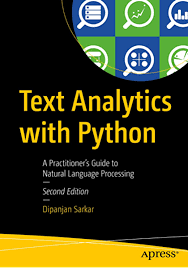


**Disponível em:**

> https://github.com/Apress/text-analytics-w-python-2e